In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("mergedData.csv")

In [19]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [4]:
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Linear Regression Analysis - on how User type affects ride tendency

In [21]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [22]:
df['member_casual_encoded'] = df['member_casual'].map({'casual': 0, 'member': 1})

In [23]:
# Preparing the features and target variable for linear regression
X = df[['member_casual_encoded']]  # Independent variable
y = df['ride_duration']  # Dependent variable

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict on the test set
y_pred = model.predict(X_test)


In [27]:
# Calculate and print the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

172.01765103867066

In [28]:
# Coefficients
coef_member_casual = model.coef_[0]
intercept = model.intercept_

coef_member_casual, intercept, rmse

(-16.06161635757538, 28.501361387599715, 172.01765103867066)

The coefficient for the user type (encoded as 0 for casual and 1 for member) is approximately -16.06. This suggests that, all else being equal, member rides tend to be about 16.06 minutes shorter than casual rides

The intercept of the regression line is approximately 28.50 minutes, indicating the average ride duration for casual users when all other factors are held constant.

The root mean squared error (RMSE) of the model is 172.01 minutes, which provides an estimate of the average deviation of ride durations predicted by the model from the actual ride durations in the test set.

These results suggest that there is a relationship between user type and ride duration, with members having slightly shorter rides on average than casual users in this sample dataset. However, considering RMSE in the context of the data: a 172-minute average prediction error indicates considerable variability that the model doesn't capture, possibly due to other factors not included in this simple model.

In [29]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

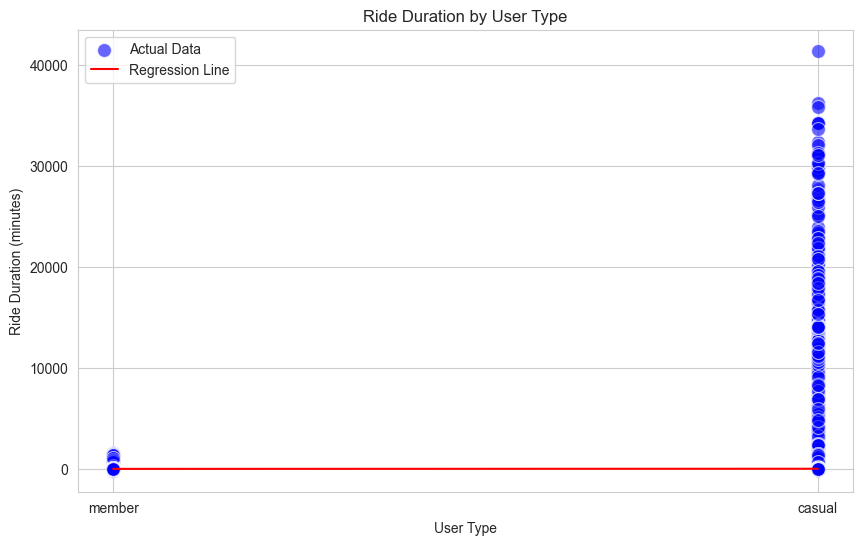

In [16]:

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the relationship between member_casual and ride_duration
plt.figure(figsize=(10, 6))

# Scatter plot for visualizing the data points
sns.scatterplot(x='member_casual', y='ride_duration', data=df, s=100, color='blue', alpha=0.6, label='Actual Data')

# Plotting the regression line
# For casual
plt.plot(['casual', 'member'], [intercept, intercept + coef_member_casual], color='red', label='Regression Line')

plt.title('Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Ride Duration (minutes)')
plt.legend()
plt.show()

The plot illustrates the relationship between user type (member or casual) and ride duration, along with the linear regression line. From the scatterplot, you can observe the actual data points for both member and casual users, with the ride duration in minutes on the y-axis and the user type on the x-axis. The red line represents the regression line that models this relationship based on the linear regression analysis.

The regression line suggests that member rides tend to be slightly shorter on average than casual rides, as indicated by the negative coefficient for the user type. However, the spread of the data points also highlights the variability in ride durations that isn't fully captured by user type alone, reinforcing the idea that additional factors likely influence ride duration

Poisson Regression Analysis

In [31]:
from sklearn.linear_model import PoissonRegressor

In [32]:
df_positive = df[df['ride_duration'] > 0]

In [33]:
X_positive = df_positive[['member_casual_encoded']]  # Independent variable
y_positive = df_positive['ride_duration']  # Dependent variable, ensured to be positive

In [34]:
X_train_positive, X_test_positive, y_train_positive, y_test_positive = train_test_split(X_positive, y_positive, test_size=0.2, random_state=42)

In [35]:
poisson_model_positive = PoissonRegressor(alpha=0, max_iter=300)
poisson_model_positive.fit(X_train_positive, y_train_positive)

PoissonRegressor(alpha=0, max_iter=300)

In [36]:
y_pred_poisson_positive = poisson_model_positive.predict(X_test_positive)

In [37]:
mse_poisson_positive = mean_squared_error(y_test_positive, y_pred_poisson_positive)
rmse_poisson_positive = np.sqrt(mse_poisson_positive)

In [38]:
coef_member_casual_poisson_positive = poisson_model_positive.coef_[0]
intercept_poisson_positive = poisson_model_positive.intercept_

In [39]:
coef_member_casual_poisson_positive, intercept_poisson_positive, rmse_poisson_positive

(-0.8328066218457426, 3.3529333202429497, 171.67122299849947)

Random Forest Regressor - How user type affects ride sharing (Ride duration as dependent variable)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Initialize and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [43]:

# Calculate and print the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

rmse_rf

172.01765800629292

Random Forest Regressor - How user type affects ride sharing (Ride distance as dependent variable)

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [46]:
df['ride_distance'] = haversine(df['start_lng'], df['start_lat'], df['end_lng'], df['end_lat'])

In [47]:
X = df[['member_casual_encoded']]  # Independent variable
y_distance = df['ride_distance']  # Dependent variable

In [48]:
X_train_dist, X_test_dist, y_train_dist, y_test_dist = train_test_split(X, y_distance, test_size=0.2, random_state=42)

In [50]:
df_clean = df.dropna(subset=['ride_distance'])

In [51]:
X_clean = df_clean[['member_casual_encoded']]  # Independent variable
y_distance_clean = df_clean['ride_distance']

In [52]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_distance_clean, test_size=0.2, random_state=42)

In [54]:
rf_model_dist = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_dist.fit(X_train_clean, y_train_clean)

RandomForestRegressor(random_state=42)

In [55]:
y_pred_dist = rf_model_dist.predict(X_test_clean)

In [57]:

# Calculate and print the model's performance for distance prediction
mse_dist = mean_squared_error(y_test_clean, y_pred_dist)
rmse_dist = np.sqrt(mse_dist)
mae_dist = mean_absolute_error(y_test_clean, y_pred_dist)

rmse_dist, mae_dist

(13.798723133731285, 1.384162783807931)